In [31]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import nbodykit.lab as nb

In [21]:
!ls /home/mehdi/data/eboss/mocks/pks/pk_NGC_*

/home/mehdi/data/eboss/mocks/pks/pk_NGC_cont_v7_512_0001.json
/home/mehdi/data/eboss/mocks/pks/pk_NGC_cont_v7_512_0002.json
/home/mehdi/data/eboss/mocks/pks/pk_NGC_cont_v7_512_0003.json
/home/mehdi/data/eboss/mocks/pks/pk_NGC_cont_v7_512_0004.json
/home/mehdi/data/eboss/mocks/pks/pk_NGC_cont_v7_512_0005.json
/home/mehdi/data/eboss/mocks/pks/pk_NGC_cont_v7_512_0006.json
/home/mehdi/data/eboss/mocks/pks/pk_NGC_cont_v7_512_0007.json
/home/mehdi/data/eboss/mocks/pks/pk_NGC_cont_v7_nosysweight_512_0001.json
/home/mehdi/data/eboss/mocks/pks/pk_NGC_cont_v7_nosysweight_512_0002.json
/home/mehdi/data/eboss/mocks/pks/pk_NGC_cont_v7_nosysweight_512_0003.json
/home/mehdi/data/eboss/mocks/pks/pk_NGC_cont_v7_nosysweight_512_0004.json
/home/mehdi/data/eboss/mocks/pks/pk_NGC_cont_v7_nosysweight_512_0005.json
/home/mehdi/data/eboss/mocks/pks/pk_NGC_cont_v7_nosysweight_512_0006.json
/home/mehdi/data/eboss/mocks/pks/pk_NGC_cont_v7_nosysweight_512_0007.json
/home/mehdi/data/eboss/mocks/pks/pk_NGC_cont_v7_

In [10]:
import numpy as np

In [38]:
plt.rc('font', size=18)

In [22]:
pks = {}
for kind in ['cont', 'null']:   
    if kind == 'cont':
        tags = ['v7_nosysweight', 'v7', 'v7_wnnz_ablation', 'v7_wnnz_plain', 'v7_wnnz_known']
    else:
        tags = ['v7_nosysweight', 'v7_noweight', 'v7', 'v7_wnnz_ablation_noweight', 'v7_wnnz_plain_noweight', 'v7_wnnz_known_noweight']
        
    for i, tag in enumerate(tags):#, 'v7_wnnz_ablation']):
        color = plt.cm.Blues_r if kind =='null' else plt.cm.Reds_r
        pk0m   = []
        pk2m   = []
        for mocki in range(1, 8):            
            d0    = nb.ConvolvedFFTPower.load(f'/home/mehdi/data/eboss/mocks/pks/'\
                                              +f'pk_NGC_{kind}_{tag}_512_{mocki:04d}.json')
            k      = d0.poles.coords['k']
            pk2    = (d0.poles['power_2'].real )#- d0.attrs['shotnoise'])
            pk0    = (d0.poles['power_0'].real - d0.attrs['shotnoise'])
            pk0m.append(pk0)
            pk2m.append(pk2)
            #plt.plot(k, k*pk,
            #        color=color(i/5),
            #        ls=ls[i])
        pks['_'.join((kind, tag))] = (k, np.mean(pk0m, 0), np.mean(pk2m, 0))

In [23]:
pks.keys()

dict_keys(['cont_v7_nosysweight', 'cont_v7', 'cont_v7_wnnz_ablation', 'cont_v7_wnnz_plain', 'cont_v7_wnnz_known', 'null_v7_nosysweight', 'null_v7_noweight', 'null_v7', 'null_v7_wnnz_ablation_noweight', 'null_v7_wnnz_plain_noweight', 'null_v7_wnnz_known_noweight'])

In [39]:
plt.style.use('dark_background')

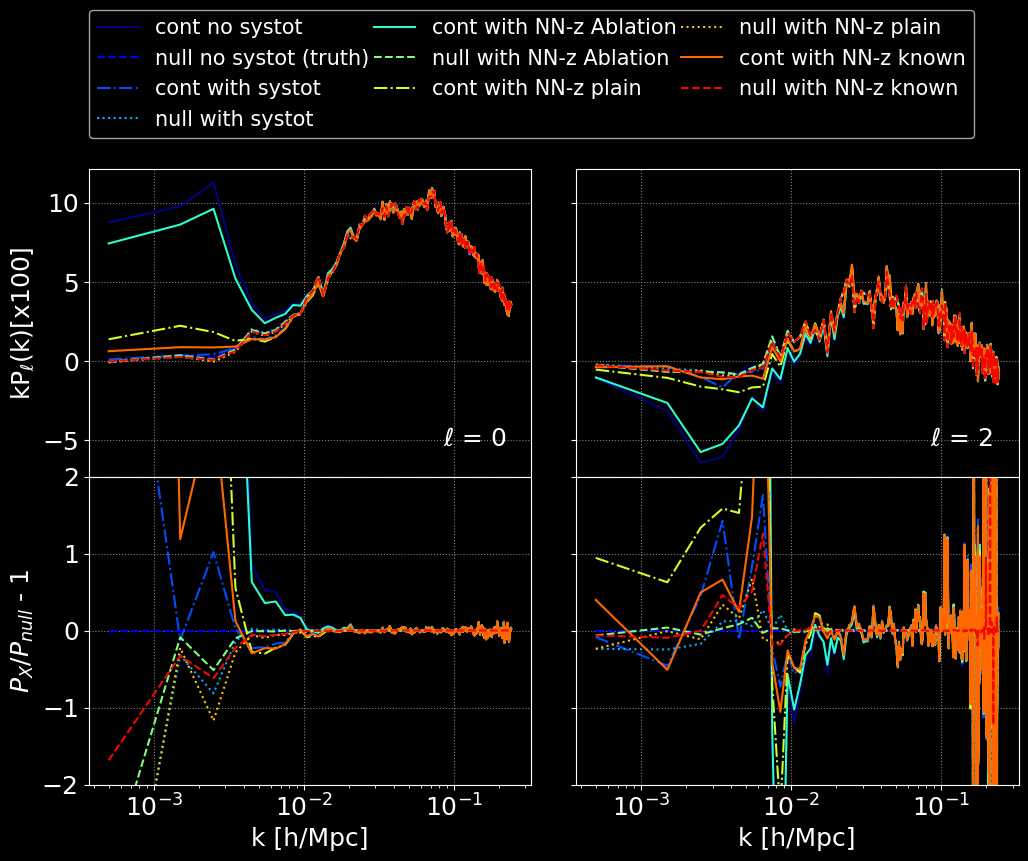

In [40]:
labels = {'cont_v7_nosysweight' : 'cont no systot',
          'null_v7_nosysweight' : 'null no systot (truth)',
          'cont_v7'             : 'cont with systot',
          'null_v7'             : 'null with systot',
          #'null_v7_noweight'    : 'null no weight',
          'cont_v7_wnnz_ablation': 'cont with NN-z Ablation',
          'null_v7_wnnz_ablation_noweight': 'null with NN-z Ablation',
          'cont_v7_wnnz_plain'  : 'cont with NN-z plain',
          'null_v7_wnnz_plain_noweight'  : 'null with NN-z plain',
          'cont_v7_wnnz_known'           : 'cont with NN-z known',
          'null_v7_wnnz_known_noweight'  : 'null with NN-z known'   
          }


# --- plot Pks of the mocks
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12,8), sharey='row', sharex=True)
ax      = ax.flatten()
fig.subplots_adjust(wspace=0.1, hspace=0.0)

linetypes    = 12*['-', '--', '-.', ':'] #['-', '-', '-.', '-.', '--','--']
kt, p0t, p2t = pks['null_v7_nosysweight']

for i, key in enumerate(labels.keys()):
    k, p0, p2 = pks[key]
    kind = key.split('_')[0]
    #color = 'k' if kind=='null' else 'red'
    color  = plt.cm.jet(i/10)
    ax[0].plot(k, k*p0/1e2, color=color, linestyle=linetypes[i], label=labels[key])
    ax[1].plot(k, k*p2/1e2, color=color, linestyle=linetypes[i])
    
    if key == 'cont_v7_nosys':continue
    ax[2].plot(k, (p0/p0t) - 1, color=color, linestyle=linetypes[i])
    ax[3].plot(k, (p2/p2t) - 1, color=color, linestyle=linetypes[i])
    
    
ax[0].text(0.8, 0.1, r'$\ell$ = 0', transform=ax[0].transAxes)
ax[1].text(0.8, 0.1, r'$\ell$ = 2', transform=ax[1].transAxes)
ax[0].legend(bbox_to_anchor=(0, 1.1, 2., 0.4), loc="lower left",
                mode="expand", borderaxespad=0, ncol=3, fontsize=15)
ax[0].set(xscale='log', ylabel=r'kP$_{\ell}$(k)[x100]')
ax[2].set(ylabel=r'$P_{X}/P_{null}$ - 1')
for axi in ax[2:]:axi.set(xlabel='k [h/Mpc]', ylim=(-2.0, 2.0))
for axi in ax:axi.grid(True, linestyle=':', color='grey')

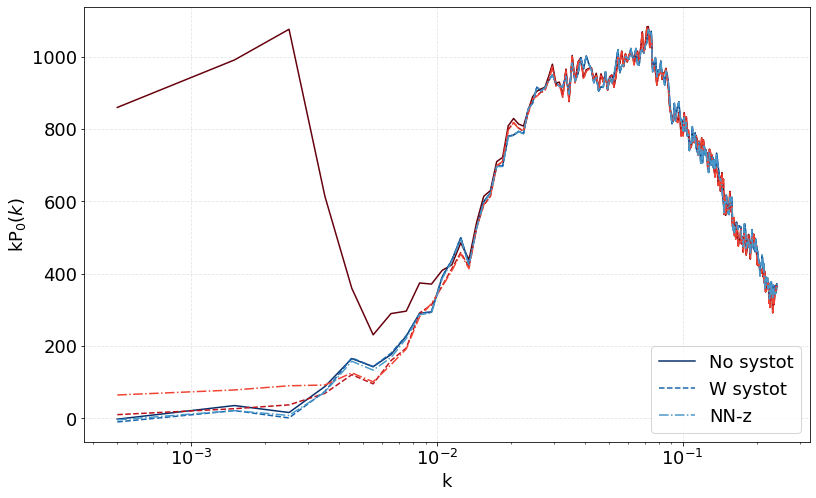

In [18]:
plt.figure(figsize=(13, 8))
ls = ['-', '--', '-.', ':']
nm = ['No systot', 'W systot', 'NN-z']

for i, tag in enumerate(['v7_nosys', 'v7', 'v7_wnnz_plain']):#, 'v7_wnnz_ablation']):

    for kind in ['cont', 'null']:      
        color = plt.cm.Blues_r if kind =='null' else plt.cm.Reds_r
        pkm   = []
        for mocki in range(1, 10):            
            d0    = nb.ConvolvedFFTPower.load(f'/home/mehdi/data/eboss/mocks/pks/'\
                                              +f'pk_NGC_{kind}_{tag}_512_{mocki:04d}.json')
            k     = d0.poles.coords['k']
            #pk    = (d0.poles['power_2'].real )#- d0.attrs['shotnoise'])
            pk    = (d0.poles['power_0'].real - d0.attrs['shotnoise'])
            pkm.append(pk)
            #plt.plot(k, k*pk,
            #        color=color(i/5),
            #        ls=ls[i])
        label = nm[i] if kind == 'null' else None
        plt.plot(k, k*np.mean(pkm,0),
               color=color(i/5),
               ls=ls[i], label=label)

plt.legend()    
plt.xscale('log')
# plt.yscale('log')
plt.ylabel(r'kP$_{0}(k)$')
plt.xlabel('k')
plt.grid(linestyle='--', color='grey', alpha=0.2)
plt.savefig('kpk_mocks.png', dpi=300)

In [66]:
import sys
sys.path.append('/home/mehdi/github/LSSutils')
from LSSutils.catalogs.datarelease import cols_eboss_v6_qso_simp as labels

In [62]:
from glob import glob

In [68]:
len(labels)

17

130
154 1.54
233 2.33


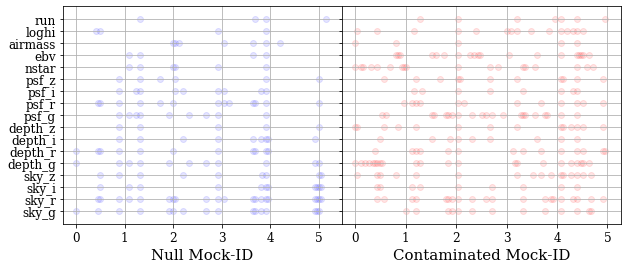

In [72]:
def hyper_params():
    # mpl.rcParams.update(mpl.rcParamsDefault)
    params = {
    'axes.spines.right':True,
    'axes.spines.top':True,
    'axes.labelsize': 15,
    #'text.fontsize': 8,
    'legend.fontsize': 15,
    'xtick.labelsize': 12,
    'ytick.labelsize': 12,
    #'text.usetex': True,
    'figure.figsize': [10, 5],
    'font.family':'serif',
    'font.size':12
    }    
    plt.rcParams.update(params)      
    def get_all(ablationlog):
        d = np.load(ablationlog, allow_pickle=True).item()
        indices = None
        for il, l in enumerate(d['validmin']):
            m = (np.array(l) - d['MSEall']) > 0.0
            #print(np.any(m), np.all(m))
            if np.all(m):
                #print(il, d['indices'][il])
                #print(il, [lbs[m] for m in d['indices'][il]])
                #break
                indices = d['indices'][il]
                break
            if (il == len(d['validmin'])-1) & (np.any(m)):
                indices = [d['indices'][il][-1]]       
        # return either None or indices
        return indices
    def get_axes(files):    
        axes = []
        for filei in files:
            axi = get_all(filei)
            if axi is not None:
                axes.append(axi)
            else:
                axes.append(np.nan)
        return axes
    files1 = glob('/home/mehdi/data/eboss/mocks/null/*/results_NGC_*_256/ablation/eboss_mocks.log_fold*.npy')
    files2 = glob('/home/mehdi/data/eboss/mocks/cont/*/results_NGC_*_256/ablation/eboss_mocks.log_fold*.npy')
    print(len(files1))
    axes1 = get_axes(files1)
    axes2 = get_axes(files2)
    def add_plot(axes, ax, **kw):
        m = 0
        for i in range(len(axes)):
            if axes[i] is np.nan:
                continue
            else:
                #print(axes[i])
                n = len(axes[i])
                m += n
                for j in range(n):
                    ax.scatter(i*0.04, axes[i][j], marker='o', **kw)    
        print(m, m/100.)

    #labels = ['EBV', 'lnHI', 'nstar']
    #labels += [''.join((s,'-',b)) for s in ['depth', 'seeing', 'skymag', 'exptime', 'mjd']\
    #           for b in 'rgz']
    fig, ax = plt.subplots(ncols=2, sharey=True, figsize=(10, 4))
    plt.subplots_adjust(wspace=0)
    #for j in [0, 1, 2, 7, 10, 11, 12, 14, 16, 17]:
    #    labels[j] = labels[j]+'*'
    #    ax[1].plot([-1, 101], [j, j], color='k')

    add_plot(axes1, ax[0], color='b', alpha=0.1)
    add_plot(axes2, ax[1], color='r', alpha=0.1)
    ax[0].set_yticks(np.arange(17))
    ax[0].set_yticklabels(labels)
    tl = ['Null', 'Contaminated']
    for i,axi in enumerate(ax):
        #axi.set_title(tl[i])
        axi.grid()
        axi.set_xlabel(tl[i]+' Mock-ID')    
    #plt.savefig('./figs/hyper-params.pdf', bbox_inches='tight')
    plt.show()
hyper_params()   

In [1]:
import logging
import os
logging.basicConfig(
    #filename="test.log",
    level=logging.INFO,
    format="%(asctime)s:%(levelname)s:%(message)s"
    )


import sys
sys.path.append('/home/mehdi/github/LSSutils')
from LSSutils.catalogs.combinefits import EBOSSCAT, hd5_2_fits
from LSSutils.catalogs.datarelease import cols_eboss_v6_qso_simp as my_cols

import numpy as np
import pandas as pd

camb is not installed!


In [2]:
logger = logging.getLogger("prepare")

In [3]:
imock = 1
kind  = 'cont'

In [5]:
nside     = 256
cap       = 'NGC'
target    = 'QSO'
zcuts     = {'0.8': [0.80, 1.14],
             '1.1': [1.14, 1.39],
             '1.4': [1.39, 1.63],
             '1.6': [1.63, 1.88],
             '1.9': [1.88, 2.20]}

# --- input files
logger.info('prepare the files for NN regression for {}'.format(kind))
if kind == 'cont':
    input_dir = '/B/Shared/eBOSS/contaminated'
    mock_name_out = input_dir+ f'/EZmock_eBOSS_{target}_{cap}_v7_{imock:04d}.dat.fits'
    rand_name_out = input_dir+ f'/EZmock_eBOSS_{target}_{cap}_v7_{imock:04d}.ran.fits'
    output_dir    = '/home/mehdi/data/eboss/mocks/cont' + f'/{imock:04d}'
elif kind == 'null':
    input_dir = '/B/Shared/eBOSS/null'
    mock_name_out = input_dir+ f'/EZmock_eBOSS_{target}_{cap}_v7_noweight_{imock:04d}.dat.fits'
    rand_name_out = input_dir+ f'/EZmock_eBOSS_{target}_{cap}_v7_noweight_{imock:04d}.ran.fits'
    output_dir    = '/home/mehdi/data/eboss/mocks/null' + f'/{imock:04d}'
else:
    raise ValueError(f'{kind} should be either cont or null')

logger.info('read {}'.format(mock_name_out))
logger.info('read {}'.format(rand_name_out))


# --- imaging templates
systematics_dir  = '/home/mehdi/data/eboss/sysmaps'
systematics_name = systematics_dir + '/SDSS_HI_imageprop_nside256.h5'
dataframe = pd.read_hdf(systematics_name)
logger.info('read {}'.format(systematics_name))

# --- check if the output directory exists
if not os.path.isdir(output_dir):
    logger.info('create {}'.format(output_dir))
    os.makedirs(output_dir)
logger.info('results will be written under {}'.format(output_dir))    
    

# --- read the data and randoms
mock   = EBOSSCAT([mock_name_out],
                weights=['weight_fkp', 'weight_noz', 'weight_cp'])
random = EBOSSCAT([rand_name_out],
                weights=['weight_fkp', 'weight_noz', 'weight_cp', 'weight_systot'])

for i, key_i in enumerate(zcuts):
    logger.info('split based on {}'.format(zcuts[key_i]))

    # --- prepare the names for the output files
    hpcat     = output_dir + f'/galmap_{cap}_{key_i}_{nside}.hp.fits'
    hpmask    = output_dir + f'/mask_{cap}_{key_i}_{nside}.hp.fits'
    fracgood  = output_dir + f'/frac_{cap}_{key_i}_{nside}.hp.fits'
    fitname   = output_dir + f'/ngal_features_{cap}_{key_i}_{nside}.fits'    
    fitkfold  = output_dir + f'/ngal_features_{cap}_{key_i}_{nside}.5r.npy'


    mock.apply_zcut(zcuts[key_i])
    mock.project2hp(nside)
    mock.writehp(hpcat)    
    
    ##random.apply_zcut(zcuts[key_i]) ## -- we don't cut randoms
    random.project2hp(nside)
    
    
    # --- append the galaxy and random density
    dataframe_i = dataframe.copy()
    dataframe_i['ngal'] = mock.galm
    dataframe_i['nran'] = random.galm    
    dataframe_i['nran'][random.galm == 0] = np.nan
    
    dataframe_i.dropna(inplace=True)
    logger.info('df shape : {}'.format(dataframe_i.shape))
    logger.info('columns  : {}'.format(my_cols))
    
    # --- write 
    hd5_2_fits(dataframe_i, 
                  my_cols, 
                  fitname, 
                  hpmask, 
                  fracgood, 
                  fitkfold,
                  res=nside, 
                  k=5)   

2019-11-25 16:42:52,063:INFO:prepare the files for NN regression for cont
2019-11-25 16:42:52,065:INFO:read /B/Shared/eBOSS/contaminated/EZmock_eBOSS_QSO_NGC_v7_0001.dat.fits
2019-11-25 16:42:52,066:INFO:read /B/Shared/eBOSS/contaminated/EZmock_eBOSS_QSO_NGC_v7_0001.ran.fits
2019-11-25 16:42:52,137:INFO:read /home/mehdi/data/eboss/sysmaps/SDSS_HI_imageprop_nside256.h5
2019-11-25 16:42:52,138:INFO:results will be written under /home/mehdi/data/eboss/mocks/cont/0001
2019-11-25 16:42:52,478:INFO:split based on [0.8, 1.14]
2019-11-25 16:42:53,498:INFO:df shape : (60158, 19)
2019-11-25 16:42:53,499:INFO:columns  : ['sky_g', 'sky_r', 'sky_i', 'sky_z', 'depth_g', 'depth_r', 'depth_i', 'depth_z', 'psf_g', 'psf_r', 'psf_i', 'psf_z', 'nstar', 'ebv', 'airmass', 'loghi', 'run']


wrote /home/mehdi/data/eboss/mocks/cont/0001/ngal_features_NGC_0.8_256.fits
wrote /home/mehdi/data/eboss/mocks/cont/0001/mask_NGC_0.8_256.hp.fits
wrote /home/mehdi/data/eboss/mocks/cont/0001/frac_NGC_0.8_256.hp.fits


2019-11-25 16:42:53,982:INFO:split based on [1.14, 1.39]


wrote /home/mehdi/data/eboss/mocks/cont/0001/ngal_features_NGC_0.8_256.5r.npy


2019-11-25 16:42:54,521:INFO:df shape : (60158, 19)
2019-11-25 16:42:54,522:INFO:columns  : ['sky_g', 'sky_r', 'sky_i', 'sky_z', 'depth_g', 'depth_r', 'depth_i', 'depth_z', 'psf_g', 'psf_r', 'psf_i', 'psf_z', 'nstar', 'ebv', 'airmass', 'loghi', 'run']


wrote /home/mehdi/data/eboss/mocks/cont/0001/ngal_features_NGC_1.1_256.fits
wrote /home/mehdi/data/eboss/mocks/cont/0001/mask_NGC_1.1_256.hp.fits
wrote /home/mehdi/data/eboss/mocks/cont/0001/frac_NGC_1.1_256.hp.fits


2019-11-25 16:42:54,986:INFO:split based on [1.39, 1.63]


wrote /home/mehdi/data/eboss/mocks/cont/0001/ngal_features_NGC_1.1_256.5r.npy


2019-11-25 16:42:55,540:INFO:df shape : (60158, 19)
2019-11-25 16:42:55,544:INFO:columns  : ['sky_g', 'sky_r', 'sky_i', 'sky_z', 'depth_g', 'depth_r', 'depth_i', 'depth_z', 'psf_g', 'psf_r', 'psf_i', 'psf_z', 'nstar', 'ebv', 'airmass', 'loghi', 'run']


wrote /home/mehdi/data/eboss/mocks/cont/0001/ngal_features_NGC_1.4_256.fits
wrote /home/mehdi/data/eboss/mocks/cont/0001/mask_NGC_1.4_256.hp.fits
wrote /home/mehdi/data/eboss/mocks/cont/0001/frac_NGC_1.4_256.hp.fits


2019-11-25 16:42:56,010:INFO:split based on [1.63, 1.88]


wrote /home/mehdi/data/eboss/mocks/cont/0001/ngal_features_NGC_1.4_256.5r.npy


2019-11-25 16:42:56,555:INFO:df shape : (60158, 19)
2019-11-25 16:42:56,556:INFO:columns  : ['sky_g', 'sky_r', 'sky_i', 'sky_z', 'depth_g', 'depth_r', 'depth_i', 'depth_z', 'psf_g', 'psf_r', 'psf_i', 'psf_z', 'nstar', 'ebv', 'airmass', 'loghi', 'run']


wrote /home/mehdi/data/eboss/mocks/cont/0001/ngal_features_NGC_1.6_256.fits
wrote /home/mehdi/data/eboss/mocks/cont/0001/mask_NGC_1.6_256.hp.fits
wrote /home/mehdi/data/eboss/mocks/cont/0001/frac_NGC_1.6_256.hp.fits


2019-11-25 16:42:57,014:INFO:split based on [1.88, 2.2]


wrote /home/mehdi/data/eboss/mocks/cont/0001/ngal_features_NGC_1.6_256.5r.npy


2019-11-25 16:42:57,559:INFO:df shape : (60158, 19)
2019-11-25 16:42:57,560:INFO:columns  : ['sky_g', 'sky_r', 'sky_i', 'sky_z', 'depth_g', 'depth_r', 'depth_i', 'depth_z', 'psf_g', 'psf_r', 'psf_i', 'psf_z', 'nstar', 'ebv', 'airmass', 'loghi', 'run']


wrote /home/mehdi/data/eboss/mocks/cont/0001/ngal_features_NGC_1.9_256.fits
wrote /home/mehdi/data/eboss/mocks/cont/0001/mask_NGC_1.9_256.hp.fits
wrote /home/mehdi/data/eboss/mocks/cont/0001/frac_NGC_1.9_256.hp.fits
wrote /home/mehdi/data/eboss/mocks/cont/0001/ngal_features_NGC_1.9_256.5r.npy
